In [16]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
#pip install spectrum_utils

In [18]:
#pip install pyteomics

In [19]:
#!pip install rdkit

In [20]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

In [21]:
import logging
from typing import Dict, IO, Iterator, Sequence, Union
from pyteomics import mgf
import pyteomics
from spectrum_utils.spectrum import MsmsSpectrum
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils as su
import numpy as np
from src.load_data import LoadData
from spectrum_utils import plot
from src.preprocessor import Preprocessor
from src.ml_model import MlModel
from src.tanimoto import Tanimoto
from sklearn.model_selection import train_test_split
from src.plotting import Plotting
import pickle
from src.cosine_distance import CosineDistance

In [22]:
from tqdm import tqdm

In [23]:
from src.spectrum_ext import SpectrumExt

In [24]:
from src.train_utils import TrainUtils
from sklearn.metrics import r2_score

In [25]:
pp =Preprocessor()

In [26]:
## THINGS TO DO:
# ADD ADITIONAL VARIABLES TO VECTOR
# TRAIN FOR MORE TIME

## Parameters

In [89]:
mgf_path = r"C:\Users\ramir\Downloads\ALL_GNPS_NO_PROPOGATED_wb.mgf"

## Load data + preprocessing

In [128]:
all_spectrums_original = LoadData.get_all_spectrums(mgf_path,1000000)

  6%|▋         | 64364/1000000 [03:16<47:33, 327.83it/s]  

We reached the end of the array at index 64364


In [129]:
len(all_spectrums_original)

64364

In [130]:
### preprocess 
all_spectrums = pp.preprocess_all_spectrums(all_spectrums_original)

64364it [00:07, 8831.47it/s] 


In [143]:
len(all_spectrums)

64364

## Divide data into training/test  + computing similarity score

In [144]:
# divide train and test
all_spectrums_train, all_spectrums_test = train_test_split(all_spectrums)

In [146]:
dir(all_spectrums_train[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotation',
 '_inner',
 'annotate_proforma',
 'annotation',
 'filter_intensity',
 'from_usi',
 'identifier',
 'inchi',
 'intensity',
 'intensity_array',
 'ionmode',
 'library',
 'max_peak',
 'mz',
 'mz_array',
 'params',
 'precursor_charge',
 'precursor_mz',
 'proforma',
 'remove_precursor_peak',
 'retention_time',
 'round',
 'scale_intensity',
 'set_intesity_array',
 'set_max_peak',
 'set_mz_array',
 'set_mz_range',
 'set_params',
 'set_smiles',
 'set_spectrum_vector',
 'smiles',
 'spectrum_vector']

In [162]:
molecule_pairs_train= TrainUtils.compute_all_tanimoto_results(all_spectrums_train[0:1000], max_combinations=10**3)

Getting indexes ... 


100%|██████████| 999/999 [00:00<00:00, 1527.14it/s]


Computing all the tanimoto results


100%|██████████| 1000/1000 [00:04<00:00, 235.01it/s]


In [163]:
len(molecule_pairs_train)

960

In [164]:
[(m.spectrum_object_0.precursor_mz,  m.spectrum_object_1.precursor_mz, m.similarity) for m in molecule_pairs_train]

[(193.05, 202.143, 0.061567164179104475),
 (199.06, 278.211, 0.11616161616161616),
 (369.118, 401.341, 0.21724890829694324),
 (180.066, 271.059, 0.15083798882681565),
 (326.233, 465.103, 0.1895910780669145),
 (256.029, 328.0, 0.16037735849056603),
 (105.066, 148.061, 0.3620689655172414),
 (227.066, 249.196, 0.12156862745098039),
 (118.086, 130.05, 0.30357142857142855),
 (439.357, 492.27, 0.12868217054263567),
 (289.217, 443.081, 0.1684981684981685),
 (168.2, 269.081, 0.12327044025157233),
 (225.123, 318.134, 0.24648985959438377),
 (249.196, 260.164, 0.12136752136752137),
 (345.054, 524.322, 0.18451915559030493),
 (201.069, 325.14, 0.1336675020885547),
 (174.055, 312.143, 0.12441860465116279),
 (260.165, 389.112, 0.12206896551724138),
 (120.065, 165.076, 0.08163265306122448),
 (203.114, 247.18, 0.1495601173020528),
 (213.076, 339.5, 0.2094736842105263),
 (268.075, 413.159, 0.26156941649899396),
 (271.06, 359.112, 0.5589094449853943),
 (572.358, 767.494, 0.29183673469387755),
 (214.094, 

In [96]:
molecule_pairs_test = TrainUtils.compute_all_tanimoto_results(all_spectrums_test, max_combinations=10**5)

  1%|          | 530/100000 [00:02<07:13, 229.44it/s]


KeyboardInterrupt: 

In [166]:
len(molecule_pairs_train)

960

In [167]:
from src.deterministic_similarity import DetSimilarity

In [170]:
molecule_pairs_train_with_cosine, cos_scores=DetSimilarity.compute_cosine(molecule_pairs_train)

100%|██████████| 960/960 [00:00<00:00, 10500.25it/s]


## Make cosine analysis

## Save data

In [ ]:
#import pickle
# Dump the dictionary to a file using pickle

#dataset ={'all_spectrums_train':all_spectrums_train,
#          'all_spectrums_test': all_spectrums_test,
#          'molecule_pairs_train':molecule_pairs_train,
#          'molecule_pairs_test': molecule_pairs_test,
#         }
#with open('./dataset_processed.pkl', 'wb') as file:
#    pickle.dump(dataset, file)

## Load data

In [ ]:
#import pickle

# Load the dataset from the pickle file
#with open('./dataset_processed.pkl', 'rb') as file:
#    dataset = pickle.load(file)

# Now you can access the original variables from the dataset dictionary
#all_spectrums_train = dataset['all_spectrums_train']
#all_spectrums_test = dataset['all_spectrums_test']
#molecule_pairs_train = dataset['molecule_pairs_train']
#molecule_pairs_test = dataset['molecule_pairs_test']


## Balance the data

(array([40839., 16652.,   733.]),
 array([0.02380952, 0.34920635, 0.67460317, 1.        ]),
 <BarContainer object of 3 artists>)

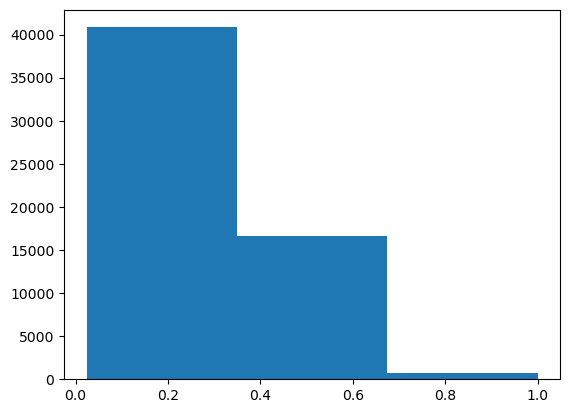

In [97]:
plt.hist([m.similarity for m in molecule_pairs_train], bins=3)

In [98]:
# get a uniform distribution of taminoto scores
uniformed_molecule_pairs_train =TrainUtils.uniformise(molecule_pairs_train, number_bins=3)

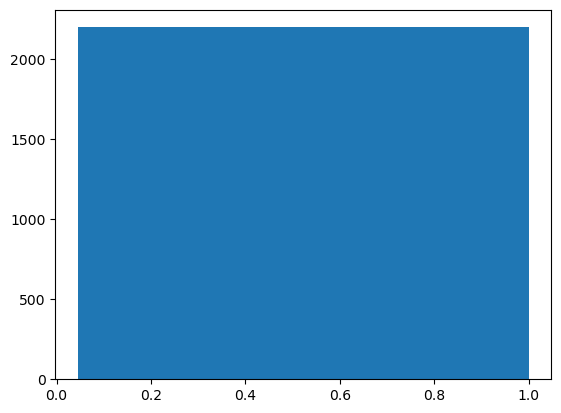

In [99]:
_=plt.hist([m.similarity for m in uniformed_molecule_pairs_train], bins=1)

## Analysis of cosine results

In [100]:
similarity_results = np.array([m.similarity for m in uniformed_molecule_pairs_train])

In [101]:
cos_results = np.array([CosineDistance.compute_cosine_distance(m.vector_0, m.vector_1) for m in uniformed_molecule_pairs_train])
cos_results=np.nan_to_num(cos_results, nan=0)

C:\Users\ramir\projects\metabolomics_experiments\src\cosine_distance.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return dot_product / (norm_array1 * norm_array2)


In [102]:
np.sum((similarity_results==1))/similarity_results.shape[0]

0.05638926784902228

In [103]:
r2_score(similarity_results, cos_results)

-1.945447399750298

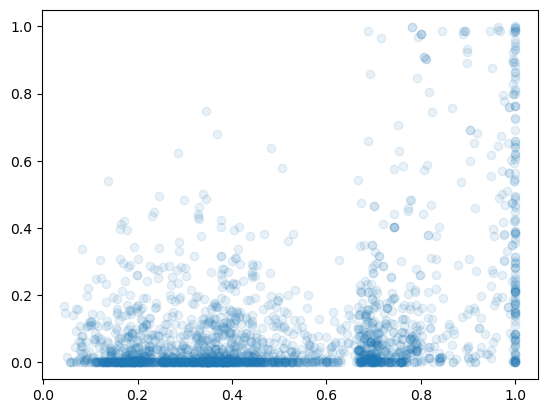

In [104]:
plt.scatter(similarity_results, cos_results, alpha=0.1)

## Train Siamese model

In [121]:
model = MlModel(input_dim=all_spectrums_train[0].spectrum_vector.shape[0])

In [122]:
model.compile()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 991)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 991)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                            

In [123]:
model.fit(uniformed_molecule_pairs_train, epochs=100)

Epoch 1/100
49/55 [=========================>....] - ETA: 0s - loss: 0.1105 - mse: 0.1105
Epoch 1: val_mse improved from inf to 0.02247, saving model to best_model.h5
55/55 [==============================] - 11s 90ms/step - loss: 0.1072 - mse: 0.1072 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 2/100
30/55 [===============>..............] - ETA: 0s - loss: 0.0891 - mse: 0.0891

C:\Users\ramir\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/55 [=======================>......] - ETA: 0s - loss: 0.0870 - mse: 0.0870
Epoch 2: val_mse did not improve from 0.02247
55/55 [==============================] - 4s 73ms/step - loss: 0.0847 - mse: 0.0847 - val_loss: 0.0307 - val_mse: 0.0307
Epoch 3/100
55/55 [==============================] - ETA: 0s - loss: 0.0754 - mse: 0.0754
Epoch 3: val_mse did not improve from 0.02247
55/55 [==============================] - 2s 41ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 4/100
49/55 [=========================>....] - ETA: 0s - loss: 0.0720 - mse: 0.0720
Epoch 4: val_mse did not improve from 0.02247
55/55 [==============================] - 2s 40ms/step - loss: 0.0728 - mse: 0.0728 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 5/100
48/55 [=========================>....] - ETA: 0s - loss: 0.0721 - mse: 0.0721
Epoch 5: val_mse did not improve from 0.02247
55/55 [==============================] - 2s 40ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0373 - val_


KeyboardInterrupt



In [ ]:
model.load_best_model()



## Evaluate performance

In [ ]:
prediction_results_train = model.predict(uniformed_molecule_pairs_train)

In [ ]:
plt.hist(prediction_results_train, bins=10)

In [ ]:
# get a uniform distribution of taminoto scores
uniformed_molecule_pairs_test =TrainUtils.uniformise(molecule_pairs_test)

In [ ]:
prediction_results_test = model.predict(uniformed_molecule_pairs_test)

In [ ]:

plt.scatter([m.similarity for m in uniformed_molecule_pairs_train], prediction_results_train, alpha=0.01)
plt.title('Prediction of Taminoto score (TRAIN)')
plt.xlabel('true')
plt.ylabel('pred')
plt.grid()

In [ ]:
plt.plot([m.similarity for m in uniformed_molecule_pairs_test])

In [ ]:
plt.plot(prediction_results_test)

In [ ]:
plt.scatter([m.similarity for m in uniformed_molecule_pairs_test], prediction_results_test, alpha=1)
plt.title('Prediction of Taminoto score (test)')
plt.xlabel('true')
plt.ylabel('pred')
plt.grid()

In [ ]:
r2_score([m.similarity for m in uniformed_molecule_pairs_test], prediction_results_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_squared_error(new_labels, prediction_results_train)

In [ ]:
mean_squared_error(labels_test_uniform, y_pred)

In [ ]:
plt.hist(labels_test_uniform)

In [ ]:
plt.hist(y_pred)
plt.grid()
plt.title('Histogram predictions')
plt.xlabel('prediction')

# equal molecules

In [105]:
high_molecules= [m for m in uniformed_molecule_pairs_train if m.similarity==1]

In [106]:
index=1

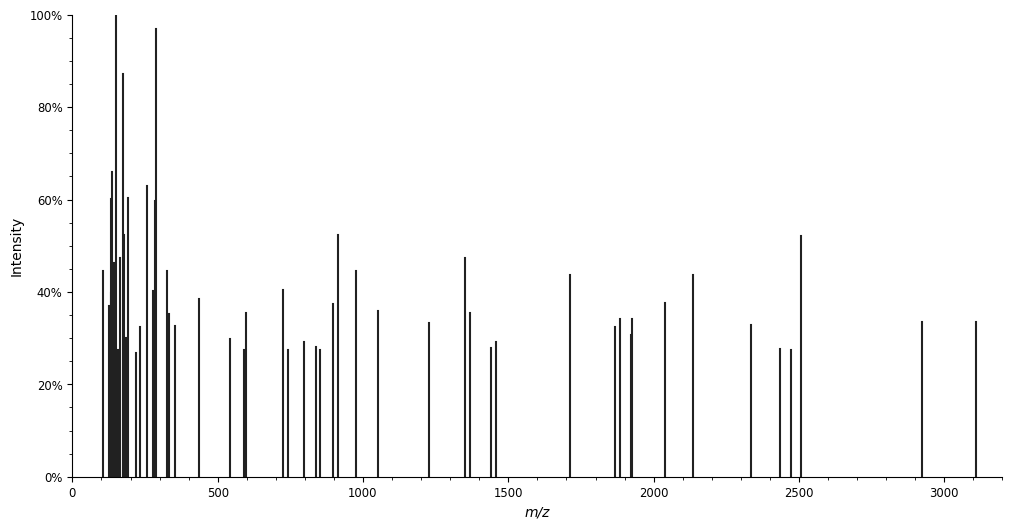

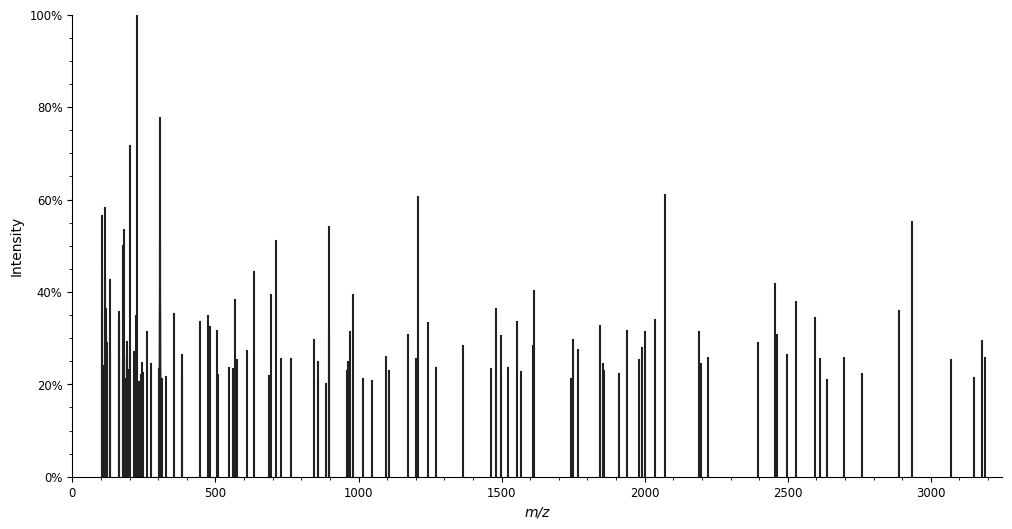

In [107]:
for s in [high_molecules[index].spectrum_object_0, high_molecules[index].spectrum_object_1]:
    Plotting.plot_spectrum(s)

In [108]:
from scipy.signal import find_peaks


In [109]:
len(find_peaks(high_molecules[index].spectrum_object_1.intensity)[0])

42

In [110]:
high_molecules[index].params_0

{'pepmass': (304.226, None),
 'charge': [1],
 'mslevel': '2',
 'source_instrument': 'DI-ESI-qTof',
 'filename': 'VD4_50A_MSMS_002_1.mgf',
 'seq': '*..*',
 'ionmode': 'Positive',
 'organism': 'GNPS-LIBRARY',
 'name': 'dehydrohaliclocyclin F dial M+H',
 'pi': 'Keyzers',
 'datacollector': 'R Keyzers',
 'smiles': 'C1=CC=[N+](C(=C1)CCCCCCCC=O)CCCCCC=O',
 'inchi': 'InChI=1S/C19H30NO2/c21-17-11-5-2-1-3-7-13-19-14-8-10-16-20(19)15-9-4-6-12-18-22/h8,10,14,16-18H,1-7,9,11-13,15H2/q+1',
 'inchiaux': 'N/A',
 'pubmed': 'N/A',
 'submituser': 'mwang87',
 'libraryquality': '3',
 'spectrumid': 'CCMSLIB00000007071',
 'scans': '2'}

In [111]:
high_molecules[index].params_1

{'pepmass': (304.226, None),
 'charge': [1],
 'mslevel': '2',
 'source_instrument': 'DI-ESI-qTof',
 'filename': 'VD4_50A_MSMS_002_1.mgf',
 'seq': '*..*',
 'ionmode': 'Positive',
 'organism': 'GNPS-LIBRARY',
 'name': 'dehydrohaliclocyclin F dial M+H',
 'pi': 'Keyzers',
 'datacollector': 'R Keyzers',
 'smiles': 'C1=CC=[N+](C(=C1)CCCCCCCC=O)CCCCCC=O',
 'inchi': 'InChI=1S/C19H30NO2/c21-17-11-5-2-1-3-7-13-19-14-8-10-16-20(19)15-9-4-6-12-18-22/h8,10,14,16-18H,1-7,9,11-13,15H2/q+1',
 'inchiaux': 'N/A',
 'pubmed': 'N/A',
 'submituser': 'mwang87',
 'libraryquality': '3',
 'spectrumid': 'CCMSLIB00000007082',
 'scans': '13'}

In [112]:
high_molecules[index].spectrum_object_1.mz

array([ 102.093376,  104.093117,  111.109917,  113.059517,  113.510139,
        116.716393,  118.690796,  118.967522,  121.859604,  129.975876,
        132.055466,  162.122345,  163.551788,  175.768921,  177.065933,
        179.140594,  179.379471,  185.605133,  190.116592,  191.577087,
        192.130096,  197.005798,  202.042343,  213.631134,  222.11087 ,
        224.524063,  230.17157 ,  237.595993,  241.093185,  242.969482,
        247.090744,  261.374695,  275.80545 ,  302.94812 ,  304.387848,
        304.431641,  304.665466,  304.904541,  304.965393,  305.010132,
        305.127533,  305.22818 ,  305.269684,  305.349579,  305.469757,
        305.761719,  305.972809,  306.660461,  313.392059,  326.089264,
        353.733276,  382.11087 ,  382.536591,  447.400177,  472.251526,
        481.868652,  506.973267,  509.75354 ,  548.682129,  561.683472,
        567.185303,  576.234558,  609.829651,  633.849304,  685.363281,
        694.843018,  711.034912,  728.344055,  764.135681,  843.

molecule_0: C1=CC=[N+](C(=C1)CCCCCCCC=O)CCCCCC=O, molecule_1 = C1=CC=[N+](C(=C1)CCCCCCCC=O)CCCCCC=O, similarity: 1.0


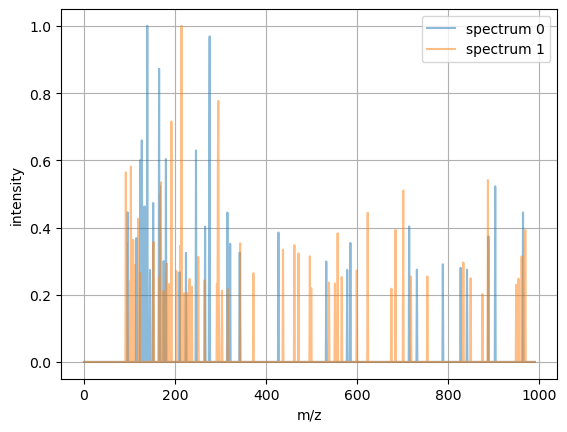

In [113]:
Plotting.plot_molecule_pair_spectrum(high_molecules[index])

In [114]:
CosineDistance.compute_cosine_distance(high_molecules[index].vector_0, high_molecules[index].vector_1)

0.2339716642838321

Text(0, 0.5, 'freq')

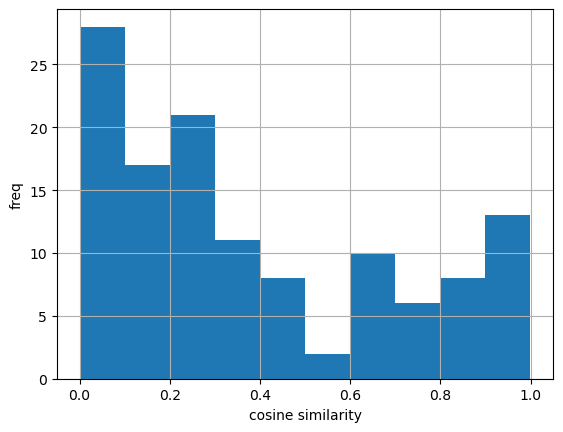

In [115]:
plt.hist([CosineDistance.compute_cosine_distance(p.vector_0, p.vector_1) for p in high_molecules])
plt.grid()
plt.xlabel('cosine similarity')
plt.ylabel('freq')

## Low molecules

In [116]:
low_molecules= [m for m in uniformed_molecule_pairs_train if m.similarity<0.1]

In [117]:
index_low=2

molecule_0: C1=CC=C2C(=C1)N=C3C=CC=CC3=N2, molecule_1 = C[C@H]1[C@H](C)[C@@H](C2=CC(OC)=C(OC)C(OC)=C2)O[C@@H]1C3=CC(OC)=C(OC)C(OC)=C3, similarity: 0.08299319727891157


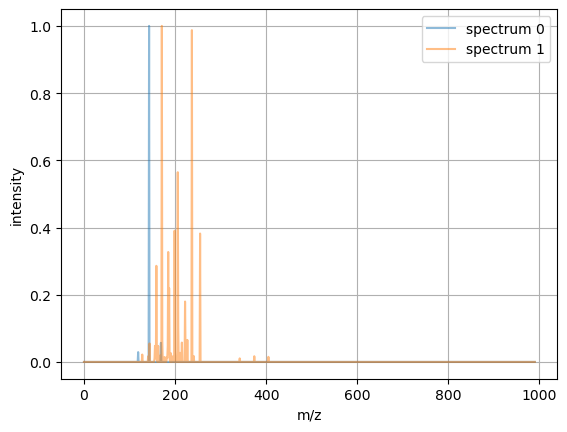

In [118]:
Plotting.plot_molecule_pair_spectrum(low_molecules[index_low])


In [119]:
CosineDistance.compute_cosine_distance(low_molecules[index_low].vector_0, low_molecules[index_low].vector_1)

0.049248393377366716

C:\Users\ramir\projects\metabolomics_experiments\src\cosine_distance.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return dot_product / (norm_array1 * norm_array2)


(array([22.,  7.,  3.,  5.,  5.,  1.,  1.,  0.,  0.,  1.]),
 array([0.        , 0.03388967, 0.06777935, 0.10166902, 0.1355587 ,
        0.16944837, 0.20333805, 0.23722772, 0.2711174 , 0.30500707,
        0.33889675]),
 <BarContainer object of 10 artists>)

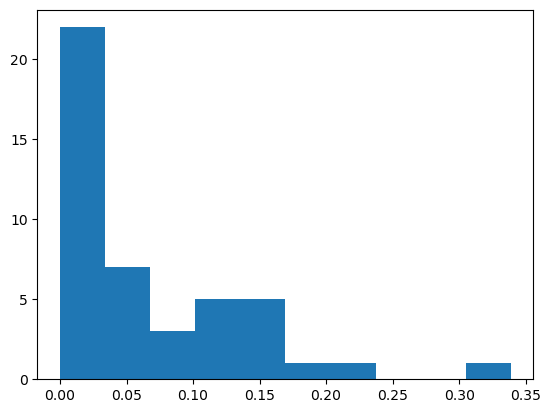

In [120]:
plt.hist([CosineDistance.compute_cosine_distance(p.vector_0, p.vector_1) for p in low_molecules])

In [ ]:
-